In [17]:
# SET INITIAL WORKING DIRECTORY
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/March 2022 CPS Data")

In [18]:
person  <- read.csv("pppub22.csv")

In [50]:
household  <- read.csv("hhpub22.csv")

In [6]:
# LOAD PACKAGES

# Package names
packages <- c("tidyverse", "reshape2")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [46]:
# FUNCTIONALIZE ggplot2 geom_point

x_y_geom_point  <- function(df, x, y, xlab, ylab, title) {
    
    gg  <- ggplot(data = df, aes(x, y)) +
        geom_point() +
        labs(y = ylab, x = xlab, title = title)
    
    return(gg)
} 

Warning message:
"Removed 65 rows containing non-finite values (`stat_density()`)."


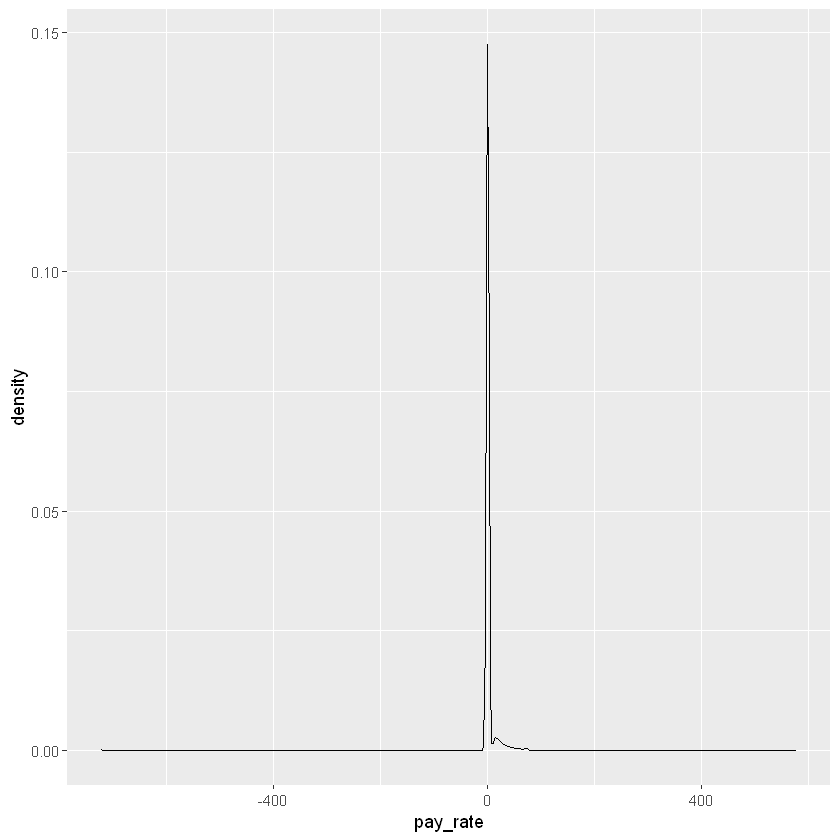

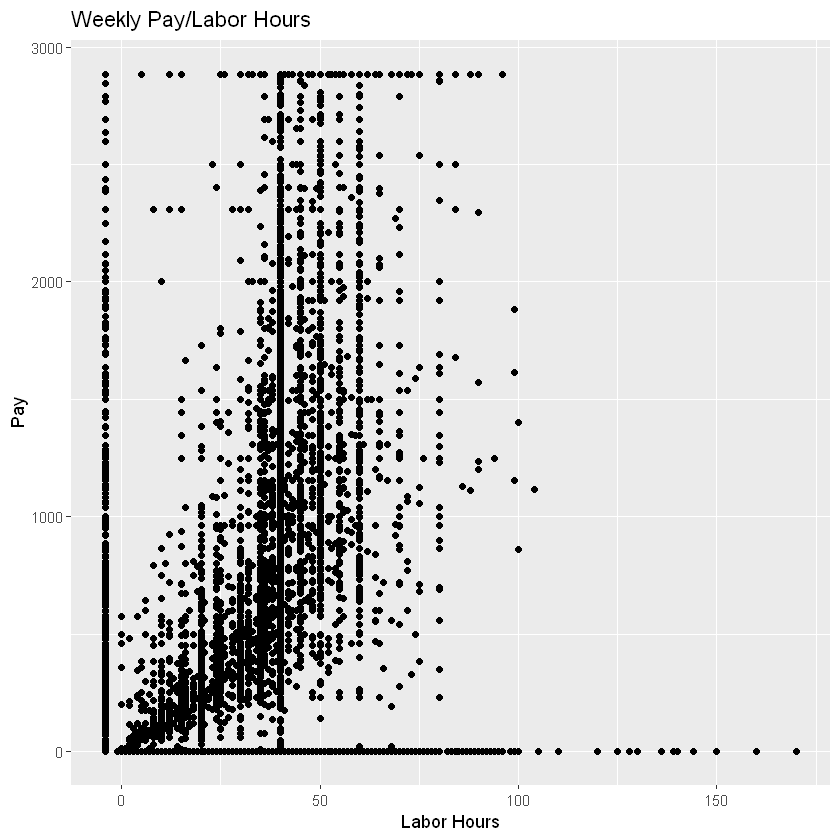

In [47]:
person_1  <- person %>%
    mutate(pay_rate = A_GRSWK/PEHRUSLT)

gg_payrate  <- ggplot(data = person_1, aes(pay_rate)) + geom_density()
gg_payrate

[1] 73863   833

Warning message:
"Removed 65 rows containing non-finite values (`stat_density()`)."


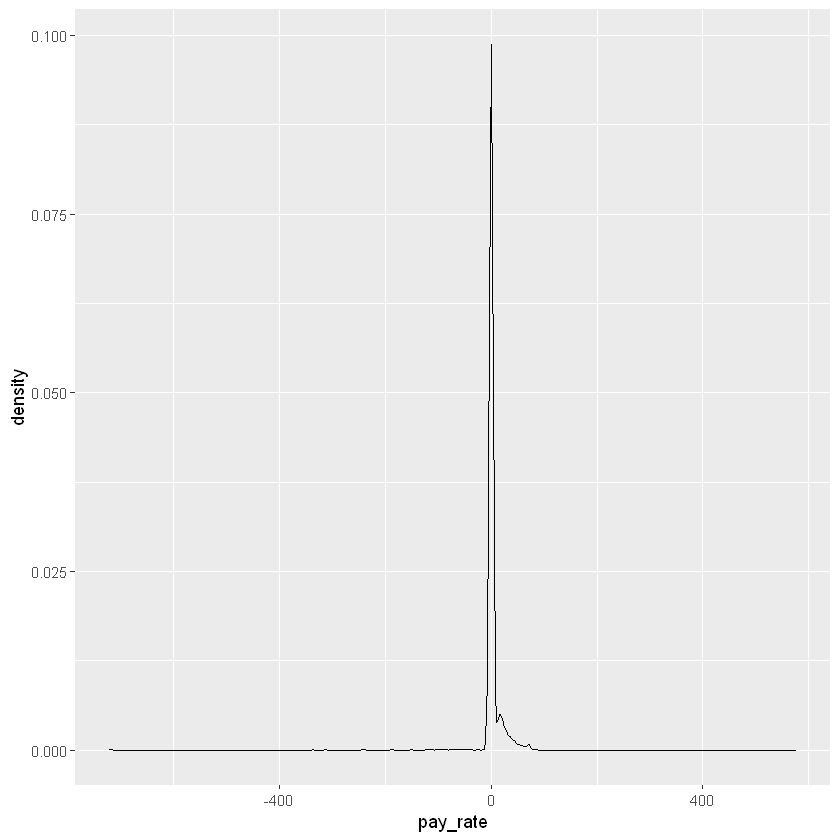

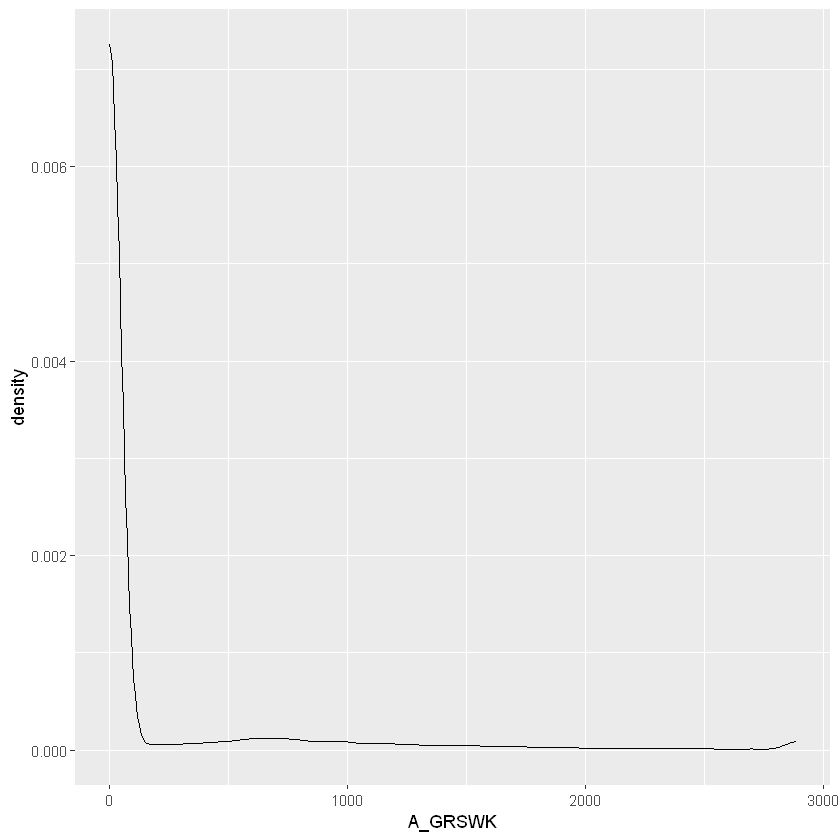

In [34]:
person_no_children_or_armed_forces  <- person_1 %>%
    filter(A_CIVLF != 0)

dim(person_no_children_or_armed_forces)
gg_payrate  <- ggplot(data = person_no_children_or_armed_forces, aes(pay_rate)) + geom_density()
gg_payrate

[1] 15941   833

Warning message:
"Removed 7 rows containing non-finite values (`stat_density()`)."


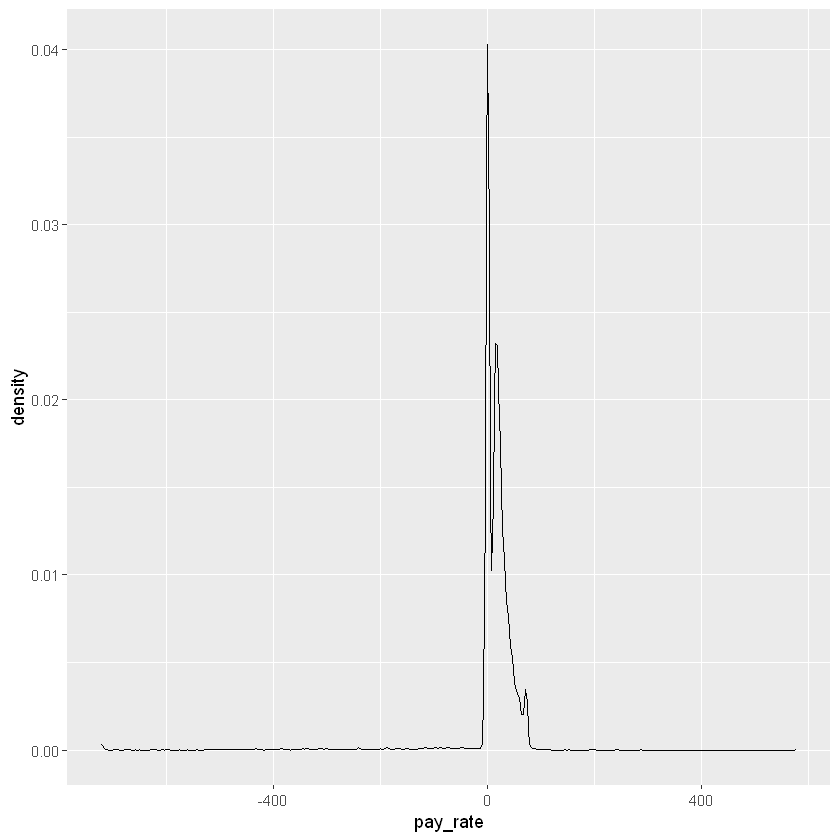

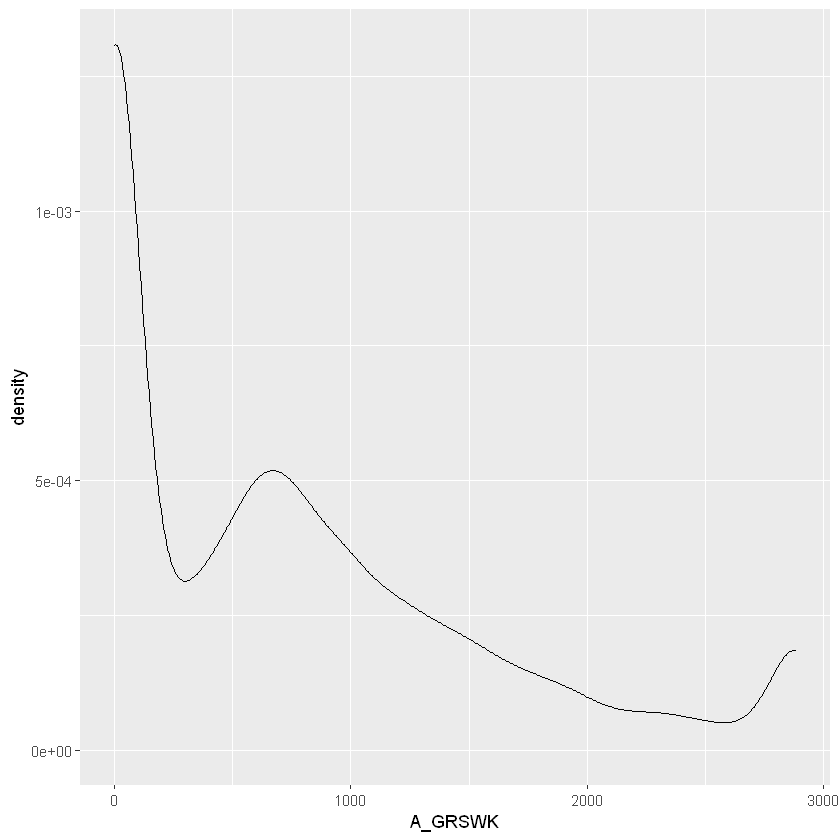

In [35]:
person_primary_income_eligibility  <- person_no_children_or_armed_forces %>%
    filter(PRERELG != 0000)

dim(person_primary_income_eligibility)
gg_payrate  <- ggplot(data = person_primary_income_eligibility, aes(pay_rate)) + geom_density()
gg_payrate

gg_weekly_income  <- ggplot(data = person_primary_income_eligibility, aes(A_GRSWK)) + geom_density()
gg_weekly_income

[1] 66731   833

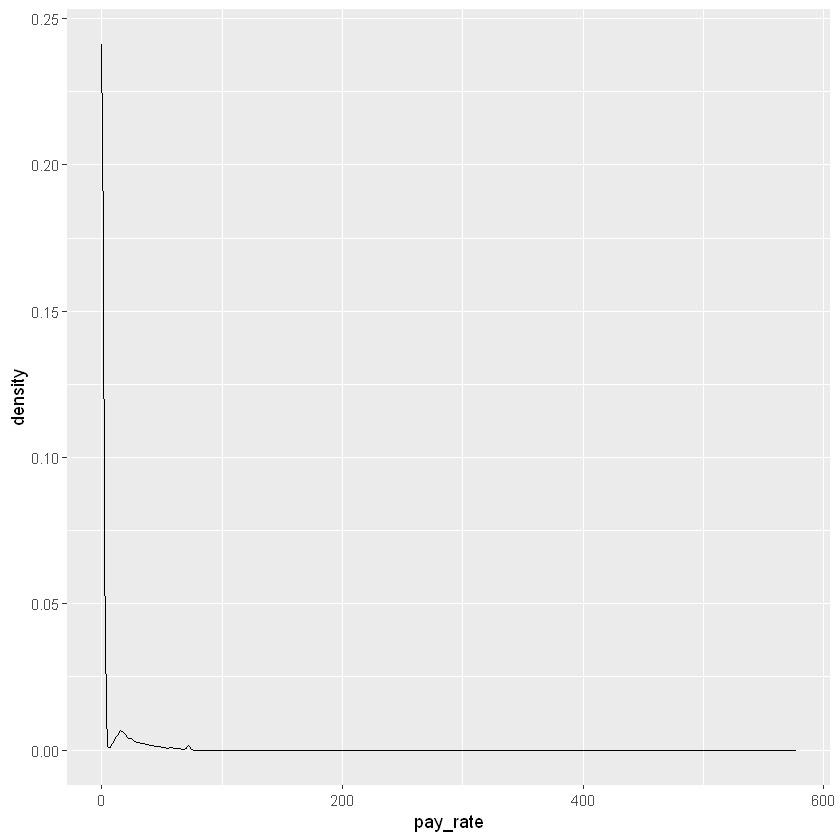

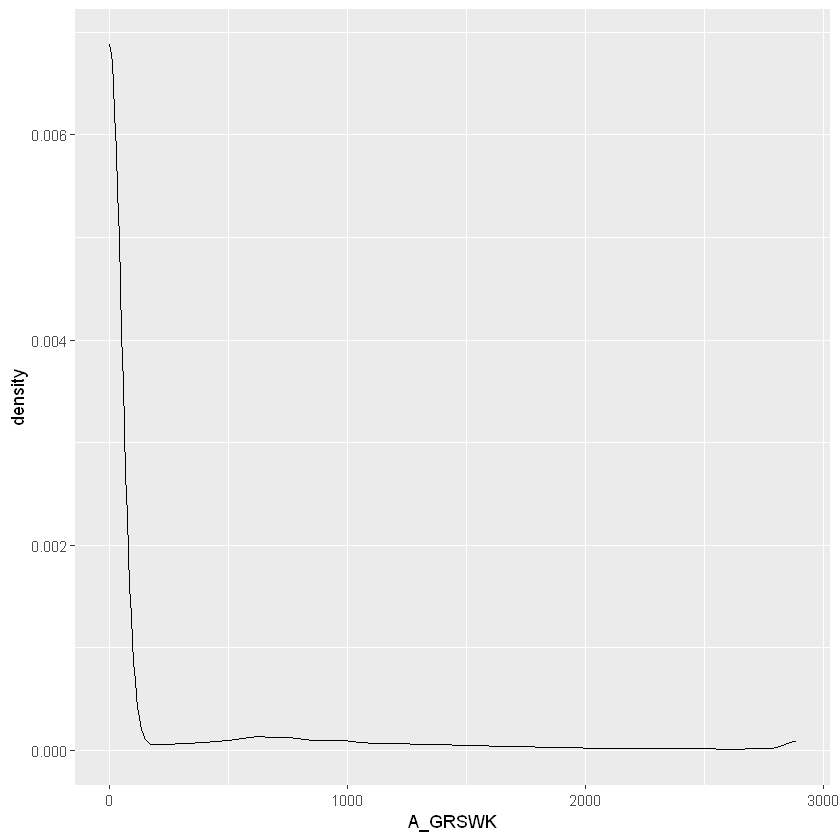

In [43]:
person_labor_hours  <- person_no_children_or_armed_forces %>%
    filter(PEHRUSLT != -4,
          PEHRUSLT != -1,
          PEHRUSLT != 000)

dim(person_labor_hours)
gg_payrate  <- ggplot(data = person_labor_hours, aes(pay_rate)) + geom_density()
gg_payrate

gg_weekly_income  <- ggplot(data = person_labor_hours, aes(A_GRSWK)) + geom_density()
gg_weekly_income

[1] 10168   833

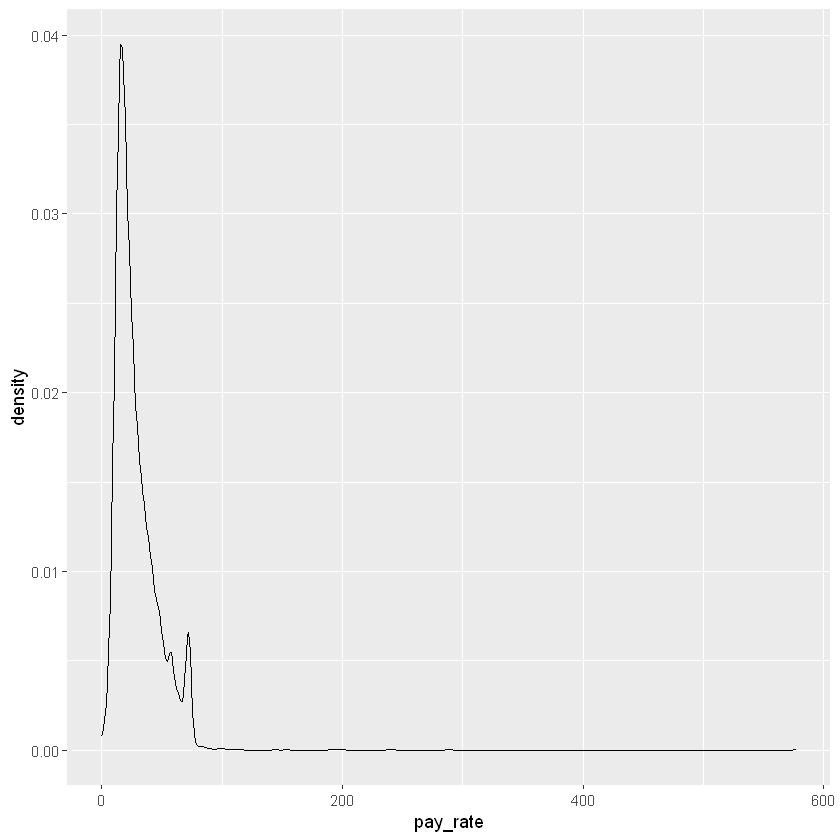

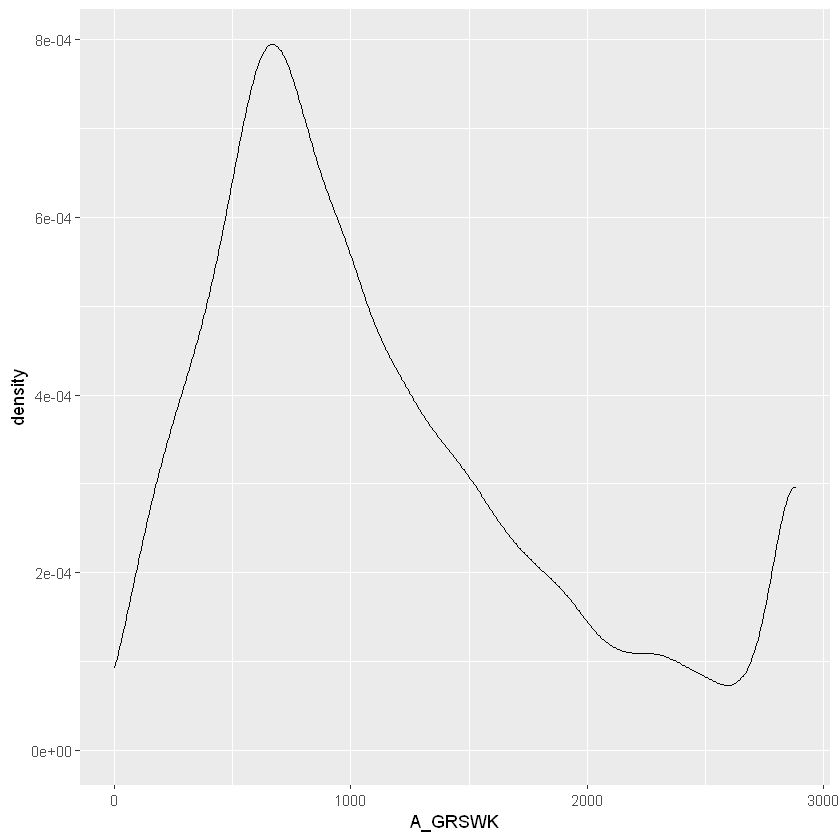

In [48]:
pp_income_over_0  <- person_labor_hours %>% # pp = person dataset, income_over_0 = the last filter applied
    filter(A_GRSWK != 0000)

dim(pp_income_over_0)

gg_payrate  <- ggplot(data = pp_income_over_0, aes(pay_rate)) + geom_density()
gg_payrate

gg_weekly_income  <- ggplot(data = pp_income_over_0, aes(A_GRSWK)) + geom_density()
gg_weekly_income

In [49]:
# Write cleaned data to CSV
write.csv(pp_income_over_0, "C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data/income_over_0_2_pppub22.csv", row.names=FALSE)

In [1]:
#REDEFINE WORKING DIRECTORY
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data") # Redefine working directory

In [54]:
# LOAD Cleaned person DF FROM WD
person_cleaned  <- read.csv("income_over_0_2_pppub22.csv")

In [64]:
# Selecting relevant variables from person dataset

pp.wages <- person_cleaned %>% 
    select(H_SEQ = PH_SEQ, PPPOS, PEHRUSLT, A_GRSWK, pay_rate)

pp.wages <- pp.wages %>% 
        rename("income_week" = "A_GRSWK",
              "hours_week" = "PEHRUSLT")

#cor.jobqual
head(pp.wages)
names(pp.wages)
#hhpp.dat <- inner_join(pp.job_qual, hh, by = c("H_SEQ"))

,H_SEQ,PPPOS,hours_week,income_week,pay_rate
,<int>,<int>,<int>,<int>,<dbl>
1,5,42,40,923,23.07500
2,9,41,55,1538,27.96364
3,9,42,50,2885,57.70000
4,77,41,50,1000,20.00000
5,77,42,20,330,16.50000
6,97,41,50,606,12.12000


[1] "H_SEQ"       "PPPOS"       "hours_week"  "income_week" "pay_rate"

In [68]:
# Selecting relevant variables from household dataset

hh  <- household %>% #establishing household variables
    select(H_SEQ, hh_income = HTOTVAL, hh_persons = H_NUMPER)

# Create adjusted income variable
hh  <- hh %>% mutate(income_adj  = hh_income/((hh_persons)^.5))

hh  <- hh %>% drop_na()

# Create income classes from adjusted income
lower_bound <- 2/3 * median(hh$income_adj)
upper_bound  <- 2 * median(hh$income_adj)
#lc

hh$income_class <- as.factor(ifelse(hh$income_adj < lower_bound, 'lower',
                          ifelse(hh$income_adj > upper_bound, "upper", "middle")))

names(hh)
head(hh)

[1] "H_SEQ"        "hh_income"    "hh_persons"   "income_adj"   "income_class"

,H_SEQ,hh_income,hh_persons,income_adj,income_class
,<int>,<int>,<int>,<dbl>,<fct>
1,1,44220,1,44220.00,middle
2,5,82752,2,58514.50,middle
3,6,60001,2,42427.11,middle
4,9,123814,5,55371.30,middle
5,10,31184,2,22050.42,lower
6,11,0,2,0.00,lower


[1] 59148     5

In [72]:
# Merge hh and pp data frames

hhpp_wages <- inner_join(pp.wages, hh, by = c("H_SEQ"))
head(hhpp_wages)
dim(hhpp_wages)

,H_SEQ,PPPOS,hours_week,income_week,pay_rate,hh_income,hh_persons,income_adj,income_class
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>
1,5,42,40,923,23.07500,82752,2,58514.50,middle
2,9,41,55,1538,27.96364,123814,5,55371.30,middle
3,9,42,50,2885,57.70000,123814,5,55371.30,middle
4,77,41,50,1000,20.00000,73513,2,51981.54,middle
5,77,42,20,330,16.50000,73513,2,51981.54,middle
6,97,41,50,606,12.12000,18002,1,18002.00,lower


[1] 10168     9

In [73]:
# Write the merged dataframe

write.csv(hhpp_wages, "C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data/hhpp_wages.csv", row.names=FALSE)

In [3]:
# Load Cleaned person DF FROM WD
hhpp_wages  <- read.csv("hhpp_wages.csv")

In [7]:
hhpp_wages$income_class  <- as.factor(hhpp_wages$income_class)

head(hhpp_wages)

,H_SEQ,PPPOS,hours_week,income_week,pay_rate,hh_income,hh_persons,income_adj,income_class
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>
1,5,42,40,923,23.07500,82752,2,58514.50,middle
2,9,41,55,1538,27.96364,123814,5,55371.30,middle
3,9,42,50,2885,57.70000,123814,5,55371.30,middle
4,77,41,50,1000,20.00000,73513,2,51981.54,middle
5,77,42,20,330,16.50000,73513,2,51981.54,middle
6,97,41,50,606,12.12000,18002,1,18002.00,lower


In [8]:
# Filter into lower, middle, and upper class DF to get coefficient estimates from

hhpp_lower_income  <- hhpp_wages %>%
    filter(income_class == c('lower'))

hhpp_middle_income  <- hhpp_wages %>%
    filter(income_class == c('middle'))

hhpp_upper_income  <- hhpp_wages %>%
    filter(income_class == c('upper'))

In [9]:
summary(hhpp_lower_income$income_week)

smry.l.inc  <- hhpp_lower_income %>%
    summarise(n_people  = length(PPPOS),
             mu_payrate = mean(pay_rate),
             sigma_payrate = sd(pay_rate))

smry.l.inc 


smry.m.inc  <- hhpp_middle_income %>%
    summarise(n_people  = length(PPPOS),
             mu_payrate = mean(pay_rate),
             sigma_payrate = sd(pay_rate))

smry.m.inc 


smry.u.inc  <- hhpp_upper_income %>%
    summarise(n_people  = length(PPPOS),
             mu_payrate = mean(pay_rate),
             sigma_payrate = sd(pay_rate))

smry.u.inc 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   399.0   600.0   670.7   800.0  2885.0 

n_people,mu_payrate,sigma_payrate
<int>,<dbl>,<dbl>
1601,18.54915,12.79918


n_people,mu_payrate,sigma_payrate
<int>,<dbl>,<dbl>
5653,25.39933,14.52806


n_people,mu_payrate,sigma_payrate
<int>,<dbl>,<dbl>
2914,39.58391,22.1167


In [16]:
smry.wage  <- hhpp_wages %>%
    summarise(n_people = length(PPPOS),
             mu_payrate = mean(pay_rate),
             sigma_payrate = sd(pay_rate))

smry.wage

n_people,mu_payrate,sigma_payrate
<int>,<dbl>,<dbl>
10168,28.38583,18.4228


$names
 [1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"    

$class
[1] "summary.glm"

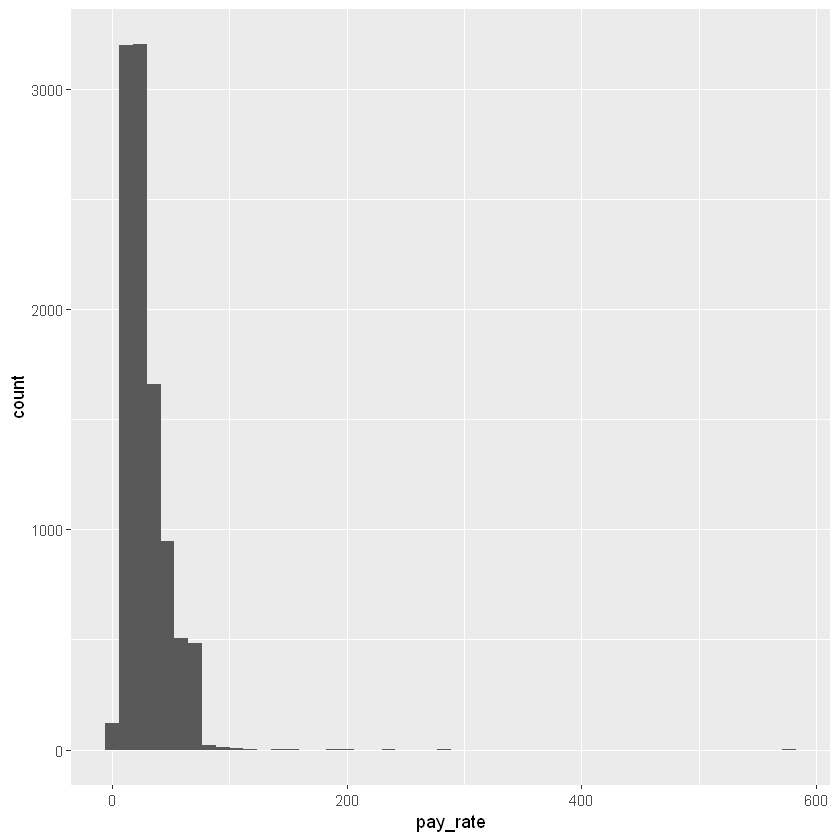

In [38]:
gg_wage_dist  <- ggplot(data = hhpp_wages, aes(pay_rate)) +
    geom_histogram(bins = 50)

gg_wage_dist

glm_wage_dist  <- glm(pay_rate ~ 1, data = hhpp_wages, family = Gamma("identity"))
smry  <- summary(glm_wage_dist)
attributes(smry)

In [44]:
?rgamma

In [412]:
wage_disp  <- smry$dispersion

rate_calc = wage_disp/28.38583
ss <- (1/rate_calc)*(wage_disp)
ss
wage_disp
rate_calc 

[1] 28.38583

[1] 0.3121788

[1] 0.0109977

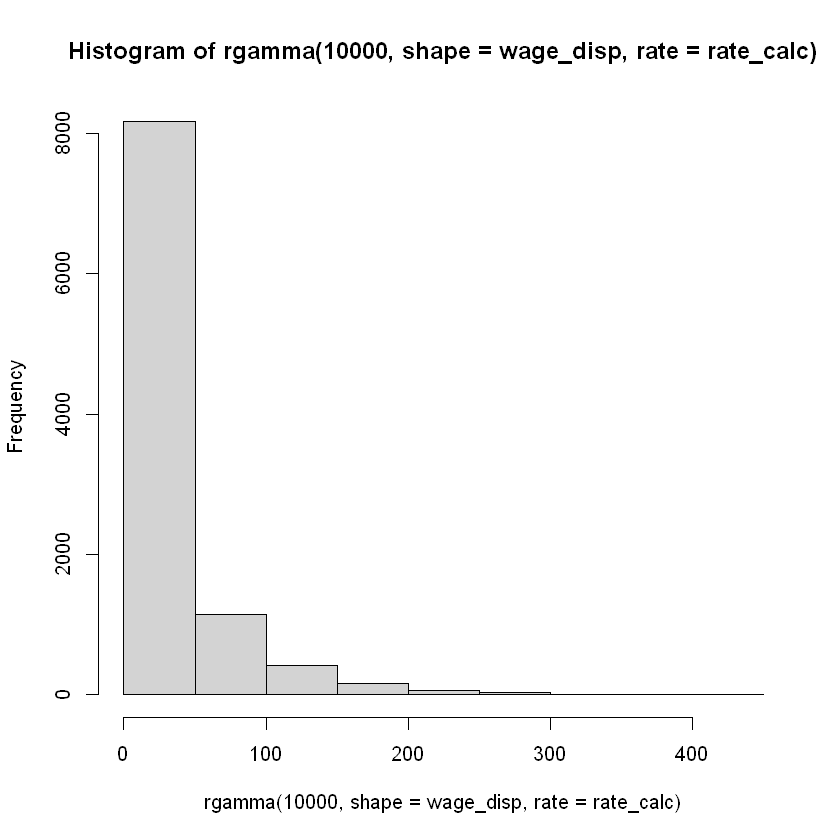

In [57]:
wage_disp  <- smry$dispersion

hist(rgamma(10000, shape = wage_disp, rate = rate_calc))
# https://pubs.wsb.wisc.edu/academics/analytics-using-r-2019/gamma-variables-optional.html


Call:
glm(formula = pay_rate ~ 1, family = Gamma("identity"), data = hhpp_lower_income)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.5492     0.3199   57.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4761195)

    Null deviance: 459.25  on 1600  degrees of freedom
Residual deviance: 459.25  on 1600  degrees of freedom
AIC: 11516

Number of Fisher Scoring iterations: 3


$names
 [1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"    

$class
[1] "summary.glm"

[1] 0.4761195

[1] 0.02566799

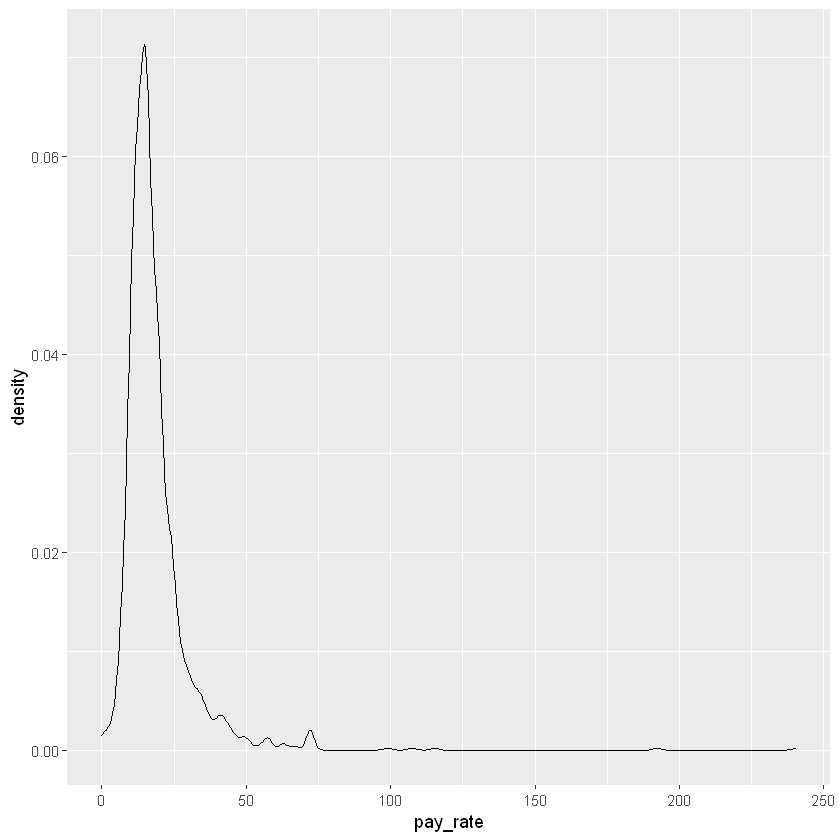

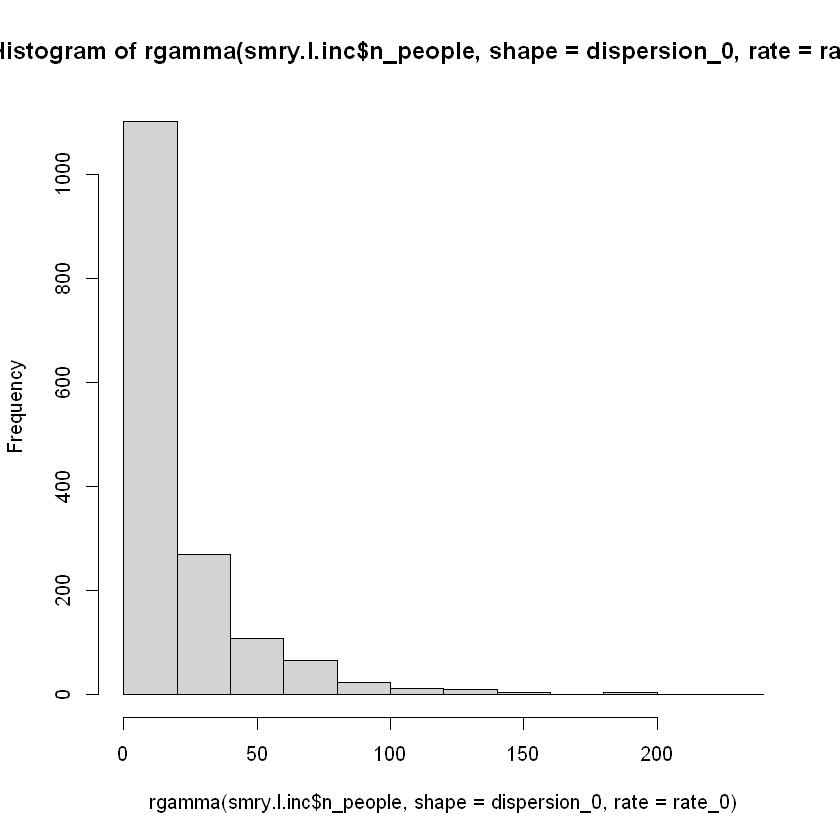

In [110]:
glm_wage_dist  <- glm(pay_rate ~ 1, data = hhpp_lower_income, family = Gamma("identity"))
smry  <- summary(glm_wage_dist)
smry
attributes(smry)

dispersion_0 <- smry$dispersion
rate_0 = dispersion_0/(smry.l.inc$mu_payrate)
dispersion_0
rate_0

# mean  <- dispersion_0 * 1/rate_0
# mean

#rgamma(smry.l.inc$n_people, shape = dispersion_0, rate = rate_0)

#ggplot(data = hhpp_lower_income, aes(pay_rate)) + geom_density()
hist(rgamma(smry.l.inc$n_people, shape = dispersion_0, rate = rate_0))


Call:
glm(formula = pay_rate ~ 1, family = Gamma("identity"), data = hhpp_middle_income)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.3993     0.1932   131.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.3271678)

    Null deviance: 1562.8  on 5652  degrees of freedom
Residual deviance: 1562.8  on 5652  degrees of freedom
AIC: 44047

Number of Fisher Scoring iterations: 3


[1] 0.3271678

[1] 25.39933

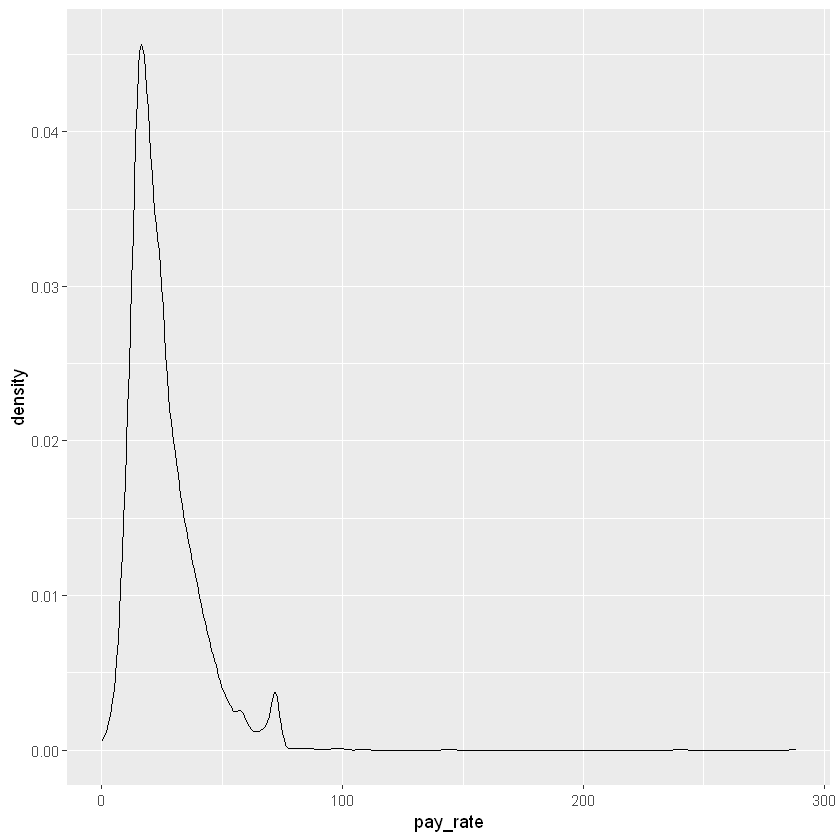

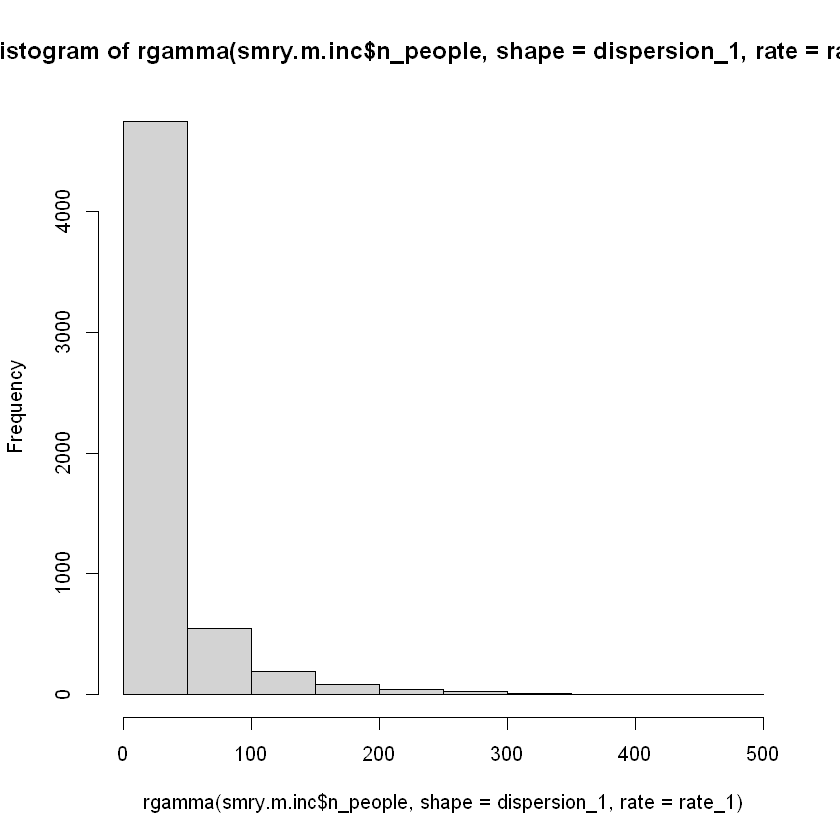

In [120]:
glm_wage_dist  <- glm(pay_rate ~ 1, data = hhpp_middle_income, family = Gamma("identity"))
smry  <- summary(glm_wage_dist)
smry

dispersion_1  <- smry$dispersion
dispersion_1
rate_1  <- dispersion_1/(smry.m.inc$mu_payrate)

smry.m.inc$mu_payrate 

ggplot(data = hhpp_middle_income, aes(pay_rate)) + geom_density()

hist(rgamma(smry.m.inc$n_people, shape = dispersion_1, rate = rate_1))


Call:
glm(formula = pay_rate ~ 1, family = Gamma("identity"), data = hhpp_upper_income)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.5839     0.4097   96.61   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.3121788)

    Null deviance: 906.03  on 2913  degrees of freedom
Residual deviance: 906.03  on 2913  degrees of freedom
AIC: 25552

Number of Fisher Scoring iterations: 3


[1] 0.3121788

[1] 39.58391

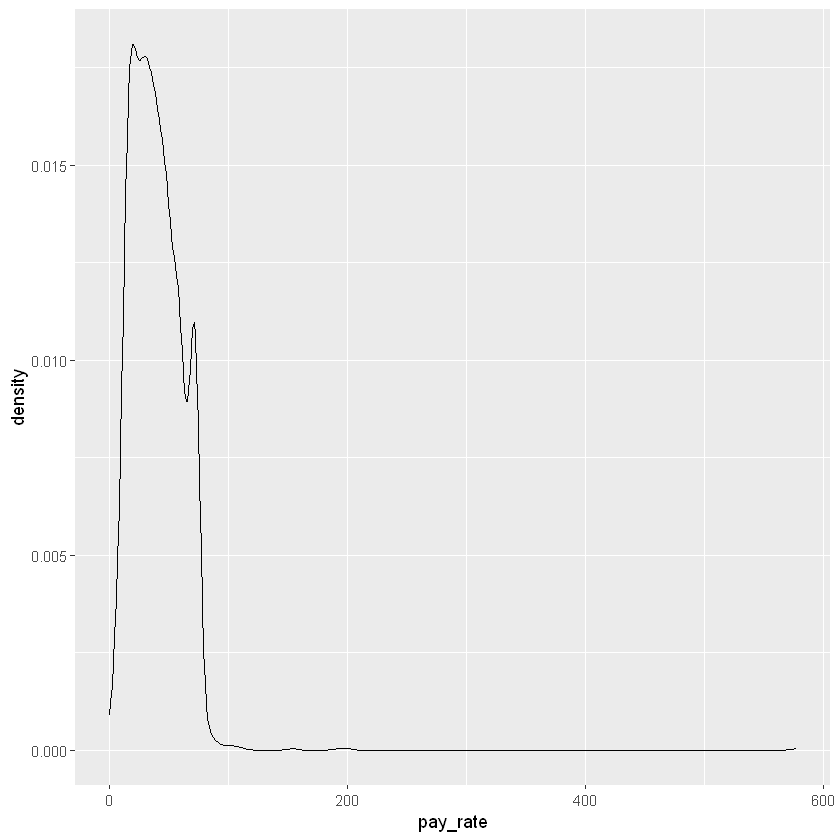

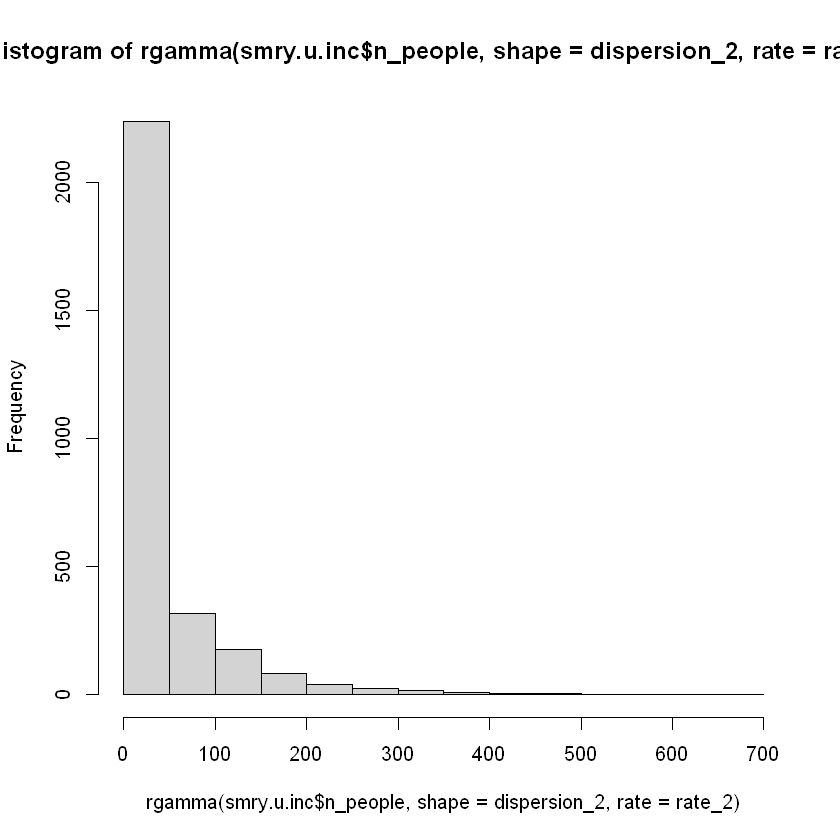

In [122]:
glm_wage_dist  <- glm(pay_rate ~ 1, data = hhpp_upper_income, family = Gamma("identity"))
smry  <- summary(glm_wage_dist)
smry

dispersion_2  <- smry$dispersion
dispersion_2
rate_2  <- dispersion_2/(smry.u.inc$mu_payrate)

ggplot(data = hhpp_upper_income, aes(pay_rate)) + geom_density()

hist(rgamma(smry.u.inc$n_people, shape = dispersion_2, rate = rate_2))

In [352]:
set.seed(666)
beta_0  <- smry.l.inc$mu_payrate
beta_1  <- smry.m.inc$mu_payrate
beta_2  <- smry.u.inc$mu_payrate

n  <-  smry.wage$n_people

sigma2_payrate  <- (smry.wage$sigma_payrate)^2
sigma2_payrate

epsilon  <- rnorm(1000, 0, sigma2_payrate)

#y  <- rgamma(n, shape = wage_disp, rate = rate_calc)

x  <- sample(c("lower", "middle", "upper"), size=n, replace = T, prob=c(linc_prop,minc_prop,uinc_prop))
x  <- factor(x)

#xy  <- data.frame(y, x)
#xy <- x[y]
#xy

#x_0  <- rgamma(1, shape = dispersion_0, rate = rate_0)
x_i1  <- rgamma(smry.m.inc$n_people, shape = dispersion_1, rate = rate_1)
x_i2  <- rgamma(smry.l.inc$n_people, shape = dispersion_2, rate = rate_2)

#x_2  <- sample(c(x_i1, x_i2), size = n, replace = T, prob = c(minc_prop,uinc_prop))

income_class  <- sample(c("lower", "middle", "upper"), size = n, replace = T, prob = c(linc_prop, minc_prop, uinc_prop))
income_class  <- as.factor(income_class)

# y <- rep(NULL, n)
# print(y)
# length(y)

# count = 0
# for (i in income_class){
#     count  <- count + 1
#     if (i == "lower"){
#         y[count] = beta_0 + rgamma(1, shape = wage_disp, rate = rate_calc)
#     }
#     else if (i == "middle"){
#         y[count] = beta_0 + beta_1 + rgamma(1, shape = wage_disp, rate = rate_calc)
#     }
#     else {
#         y[count] = beta_0 + beta_2 + rgamma(1, shape = wage_disp, rate = rate_calc)
#     }
# }

simulate_wages  <- function(size, beta_0, beta_1, beta_2, shape, rate, linc_prop, minc_prop, uinc_prop){
    
    y = rep(NULL, n)
    
    income_class  <- sample(c("lower", "middle", "upper"), size = n, replace = T, prob = c(linc_prop, minc_prop, uinc_prop))
    income_class  <- as.factor(income_class)       
    
    count = 0
    for (i in income_class){
    count  <- count + 1
    if (i == "lower"){
        y[count] = beta_0 + rgamma(1, shape = wage_disp, rate = rate_calc)
    }
    else if (i == "middle"){
        y[count] = beta_0 + beta_1 + rgamma(1, shape = wage_disp, rate = rate_calc)
    }
    else {
        y[count] = beta_0 + beta_2 + rgamma(1, shape = wage_disp, rate = rate_calc)
    }
}
    return(data.frame(y, income_class))
}

data_1  <- simulate_wages(10000, beta_0, beta_1, beta_2, wage_disp, rate_calc, linc_prop, minc_prop, uinc_prop)

#head(both)

run_analysis  <- function(data) {
    h0  <- glm(data$y ~ 1, family = Gamma("identity"))
    ha  <- glm(data$y~ data$income_class, family = Gamma("identity") )
    smry_ha  <- summary(ha)
    
    est_base  <-  smry_ha$coefficients[, 1, drop = FALSE][1]
    est_m  <- smry_ha$coefficients[, 1, drop = FALSE][2]
    
    se_m  <- smry_ha$coefficients[, 2, drop = FALSE][2]
    se_u  <- smry_ha$coefficients[, 2, drop = FALSE][3]
    
    m_aic  <- AIC(h0, ha)$AIC
    print(m_aic)
    statistic  <- diff(m_aic)
    #paste(m_aic)
    
    return(c(est_m, se_m, statistic))
}

# fit_out  <- glm(both$y~ both$income_class, family = Gamma("identity"))
# smry_fit_out  <- summary(fit_out)
# attributes(fit_out)

#fit_out$coefficients[1]

[1] 339.3997

In [410]:
fit_obj  <- run_analysis(data_1)
fit_obj
#attributes(fit_obj)
smry_fit  <- summary(fit_obj)
smry_fit
attributes(smry_fit)

# smry_fit$coefficients[, 2, drop = FALSE][2]
# smry_fit$coefficients[, 2, drop = FALSE][3]

# smry_fit$coefficients[, 1, drop = FALSE][2]


# fit_obj$coefficients

# AIC h0 = 100615
# AIC ha = 99066

#glm(data_1$y~ data_1$income_class, family = Gamma("identity"))

beta_0

[1] 100614.53  99066.28


[1]    26.7421492     0.9256026 -1548.2573944

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1548.2574  -773.6659     0.9256  -506.8632    13.8339    26.7421 

$names
[1] "Min."    "1st Qu." "Median"  "Mean"    "3rd Qu." "Max."   

$class
[1] "summaryDefault" "table"

[1] 18.54915

In [373]:
100614 - 99066

[1] 1548

In [411]:
linc_prop  <- smry.l.inc$n_people/smry.wage$n_people
minc_prop  <- smry.m.inc$n_people/smry.wage$n_people
uinc_prop  <- smry.u.inc$n_people/smry.wage$n_people

linc_prop
minc_prop
uinc_prop

repeat_analysis  <- function(n_simulations, alpha, n_subjects, beta_0, beta_1, beta_2, 
                             shape, rate, prop_0, prop_1, prop_2) {
    
    simouts <- matrix(rep(NA,3*n_simulations),nrow=n_simulations) # empty vector to store outputs from each simulation
    
    #loop for iterating simulation
    for (i in 1:n_simulations) {
        data  <- simulate_wages(n_subjects, beta_0, beta_1, beta_2, shape, rate, prop_0, prop_1, prop_2)
        simouts[i,] <- run_analysis(data) # save the analysis outputs for this sim.
    }
    
    power  <- mean(simouts[,3] <= -20)

    theta_bias_b1 <- ( mean(simouts[,1]) - beta_1 ) / (beta_1)
    
    sigma_bias_b1 <- (mean(simouts[,2]) - sd(simouts[,1])) / sd(simouts[,1])
    
    return(list(power = power, theta_b1  = theta_bias_b1, sigma_b1 = sigma_bias_b1))
}

repeat_analysis(100, .05, 10000, beta_0, beta_1, beta_2, wage_disp, rate_calc, linc_prop, minc_prop, uinc_prop)

# unsure whether the difference in estimates between beta_0 hypothesized and beta_0 estimated is relevant.

[1] 0.1574548

[1] 0.5559599

[1] 0.2865854

[1] 100238.69  98618.01
[1] 100559.48  99168.94
[1] 100084.47  98661.03
[1] 100361.61  98610.53
[1] 100369.08  98902.11
[1] 100232.22  98627.61
[1] 100738.56  99088.01
[1] 100617.01  99121.88
[1] 100218.5  98736.2
[1] 100140.77  98867.54
[1] 100206.71  98753.26
[1] 100230.34  98805.76
[1] 100421.00  98934.36
[1] 100248.06  98951.28
[1] 100298.89  99058.12
[1] 100305.76  98861.34
[1] 100253.33  98759.03
[1] 100334.39  98721.49
[1] 100298.91  99013.06
[1] 99977.80 98508.76
[1] 100347.39  98829.28
[1] 100705.06  99261.57
[1] 100352.51  99069.38
[1] 100148.56  98625.31
[1] 100599.83  99106.69
[1] 100560.70  99114.98
[1] 100085.23  98628.22
[1] 100303.1  98950.2
[1] 100700.36  99182.65
[1] 100292.79  98715.23
[1] 100678.05  99186.74
[1] 100276.74  98950.64
[1] 100243.07  98709.04
[1] 99688.45 98291.51
[1] 100290.32  98812.75
[1] 100459.98  98925.71
[1] 100269.76  98736.62
[1] 100270.37  99053.09
[1] 100543.14  99014.93
[1] 100438.15  99023.44
[1] 100406.28  98924.95
[1] 100241.08  98712.77


$power
[1] 1

$theta_b1
[1] -0.008928129

$sigma_b1
[1] -0.2046031

In [346]:
# varied MC sim

dat <- expand.grid(n_subjects = c(1000, 5000, 10000))
dat$id <- 1:nrow(dat)

# then use tidyverse functions to run the analysis for each sample size (takes ~30-60 minutes)
results <- dat  %>% 
    nest(parameters :=  c(n_subjects)) %>%
    # nest(-id, .key = 'parameters')  %>% 
#     mutate(power = map(parameters, ~ repeat_analysis(1000, 0.05, .$n_subjects, .$n_trials, 700, 50, 100,50,200)$power),
#     theta_bias = map(parameters, ~ repeat_analysis(1000, 0.05, .$n_subjects, .$n_trials, 700, 50, 100,50,200)$theta_b1),
#     sigma_bias = map(parameters, ~ repeat_analysis(1000, 0.05, .$n_subjects, .$n_trials, 700, 50, 100,50,200)$sigma_b1))  %>% 
#     unnest(c(parameters, power, theta_bias, sigma_bias))

# repeat_analysis(5, .05, 1000, beta_0, beta_1, beta_2, wage_disp, rate_calc, linc_prop, minc_prop, uinc_prop)


    mutate(power = map(parameters, ~ repeat_analysis(1000, 0.05, .$n_subjects, beta_0, beta_1, beta_2, wage_disp, rate_calc, linc_prop, minc_prop, uinc_prop)
$power),
    theta_bias_b1 = map(parameters, ~ repeat_analysis(1000, 0.05, .$n_subjects, beta_0, beta_1, beta_2, wage_disp, rate_calc, linc_prop, minc_prop, uinc_prop)
$theta_b1),
    sigma_bias_b1 = map(parameters, ~ repeat_analysis(1000, 0.05, .$n_subjects, beta_0, beta_1, beta_2, wage_disp, rate_calc, linc_prop, minc_prop, uinc_prop)
$sigma_b1)) %>% 
    unnest(c(parameters, power, theta_bias_b1, sigma_bias_b1))

In [347]:
results

id,n_subjects,power,theta_bias_b1,sigma_bias_b1
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,-0.0013495902,-0.2144873
2,5000,1,-0.0010218278,-0.2296092
3,10000,1,-0.0001102667,-0.2426161


In [310]:
summary(hhpp_wages$income_class)

linc_prop  <- smry.l.inc$n_people/smry.wage$n_people
minc_prop  <- smry.m.inc$n_people/smry.wage$n_people
uinc_prop  <- smry.u.inc$n_people/smry.wage$n_people

lower middle  upper 
  1601   5653   2914

[1] 0.1574548

In [82]:
sample(c("lower", "middle", "upper"), size=1000, replace = T, prob=c(linc_prop,minc_prop,uinc_prop))

[1] "upper"  "upper"  "middle" "lower"  "middle" "middle" "middle" "upper" 
   [9] "lower"  "middle" "upper"  "upper"  "lower"  "middle" "lower"  "middle"
  [17] "middle" "middle" "upper"  "middle" "middle" "upper"  "middle" "middle"
  [25] "middle" "upper"  "lower"  "middle" "middle" "upper"  "middle" "middle"
  [33] "upper"  "upper"  "middle" "lower"  "middle" "middle" "upper"  "middle"
  [41] "middle" "middle" "middle" "middle" "lower"  "upper"  "upper"  "middle"
  [49] "middle" "middle" "middle" "lower"  "upper"  "middle" "middle" "middle"
  [57] "upper"  "middle" "middle" "lower"  "lower"  "middle" "upper"  "middle"
  [65] "middle" "middle" "middle" "lower"  "middle" "middle" "middle" "upper" 
  [73] "upper"  "middle" "middle" "upper"  "middle" "lower"  "upper"  "middle"
  [81] "upper"  "upper"  "middle" "upper"  "middle" "middle" "upper"  "upper" 
  [89] "middle" "middle" "middle" "middle" "middle" "middle" "upper"  "lower" 
  [97] "upper"  "middle" "upper"  "upper"  "upper"  "middle" "middle" "upper" 
 [105] "middle" "middle" "upper"  "middle" "lower"  "middle" "lower"  "middle"
 [113] "upper"  "middle" "lower"  "middle" "upper"  "lower"  "lower"  "middle"
 [121] "upper"  "lower"  "middle" "lower"  "middle" "middle" "middle" "middle"
 [129] "middle" "middle" "middle" "middle" "middle" "upper"  "upper"  "middle"
 [137] "middle" "lower"  "lower"  "upper"  "middle" "lower"  "middle" "upper" 
 [145] "middle" "middle" "upper"  "lower"  "middle" "upper"  "middle" "middle"
 [153] "upper"  "upper"  "upper"  "lower"  "upper"  "lower"  "middle" "upper" 
 [161] "upper"  "lower"  "lower"  "lower"  "middle" "upper"  "middle" "middle"
 [169] "upper"  "lower"  "middle" "upper"  "lower"  "lower"  "middle" "middle"
 [177] "middle" "middle" "middle" "middle" "middle" "middle" "middle" "lower" 
 [185] "upper"  "middle" "lower"  "upper"  "middle" "lower"  "middle" "middle"
 [193] "upper"  "middle" "lower"  "lower"  "upper"  "upper"  "middle" "middle"
 [201] "middle" "middle" "upper"  "middle" "middle" "middle" "middle" "middle"
 [209] "upper"  "middle" "middle" "middle" "middle" "lower"  "lower"  "middle"
 [217] "middle" "middle" "middle" "lower"  "lower"  "middle" "upper"  "middle"
 [225] "middle" "upper"  "upper"  "middle" "middle" "middle" "middle" "middle"
 [233] "lower"  "lower"  "upper"  "middle" "lower"  "middle" "middle" "middle"
 [241] "middle" "upper"  "middle" "middle" "upper"  "upper"  "middle" "middle"
 [249] "middle" "lower"  "middle" "lower"  "upper"  "middle" "upper"  "middle"
 [257] "lower"  "middle" "middle" "middle" "upper"  "lower"  "middle" "middle"
 [265] "upper"  "middle" "middle" "upper"  "upper"  "middle" "middle" "middle"
 [273] "middle" "middle" "middle" "upper"  "upper"  "middle" "middle" "middle"
 [281] "lower"  "upper"  "upper"  "upper"  "middle" "middle" "middle" "middle"
 [289] "middle" "middle" "middle" "middle" "middle" "middle" "middle" "upper" 
 [297] "middle" "lower"  "upper"  "middle" "middle" "upper"  "middle" "middle"
 [305] "upper"  "middle" "lower"  "middle" "middle" "upper"  "upper"  "upper" 
 [313] "middle" "middle" "middle" "middle" "upper"  "middle" "lower"  "middle"
 [321] "upper"  "middle" "upper"  "middle" "middle" "upper"  "middle" "upper" 
 [329] "middle" "middle" "middle" "lower"  "middle" "upper"  "middle" "middle"
 [337] "middle" "middle" "middle" "middle" "middle" "middle" "middle" "lower" 
 [345] "upper"  "upper"  "lower"  "upper"  "middle" "upper"  "middle" "middle"
 [353] "middle" "lower"  "upper"  "lower"  "lower"  "lower"  "upper"  "middle"
 [361] "middle" "middle" "upper"  "middle" "middle" "lower"  "upper"  "upper" 
 [369] "middle" "middle" "middle" "upper"  "upper"  "middle" "middle" "middle"
 [377] "upper"  "middle" "lower"  "upper"  "middle" "upper"  "upper"  "upper" 
 [385] "upper"  "middle" "lower"  "lower"  "middle" "middle" "upper"  "upper" 
 [393] "lower"  "middle" "middle" "middle" "middle" "middle" "middle" "upper" 
 [401] "middle" "middle" "upper"  "middle" "lower"  "

In [10]:
simulate_data  <- function(sample_size, group1_mu, group1_sd, group2_mu, group2_sd) {
    
}



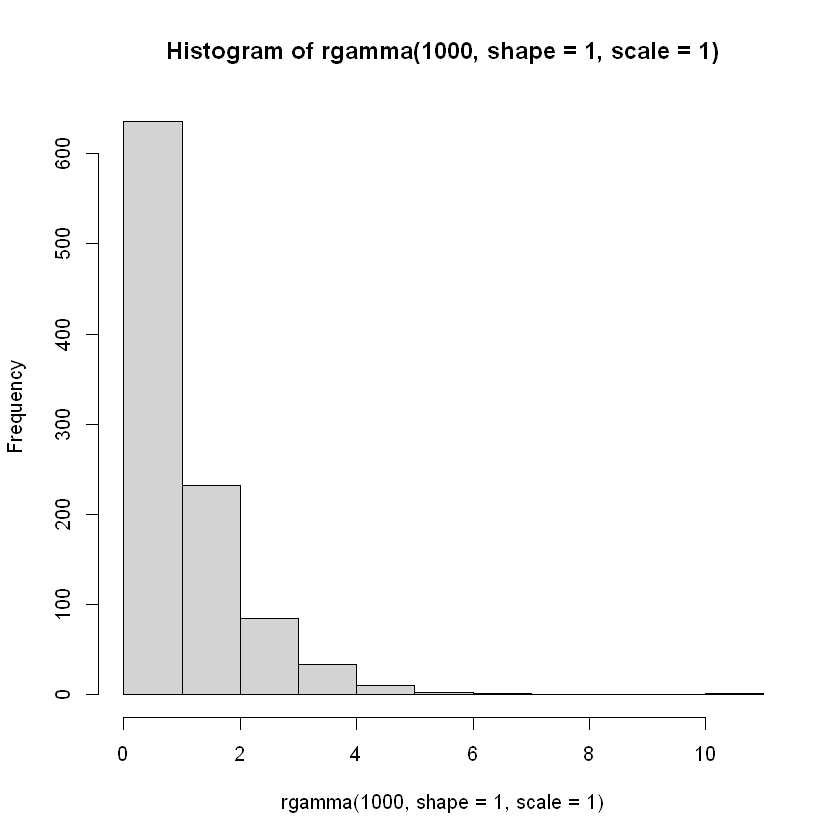

In [11]:
#?rgamma

hist(rgamma(1000, shape = 1, scale = 1))